Source : https://www.kaggle.com/khanimar/marketing-campaign-analysis-data


#Informasi Variabel-variabel

1. Id : record ID
2. target :target value (customer response to the marketing campaign) 
3. day :contact day in previous campaign 
4. month :contact month in previous campaign 
5. duration :contact duration in previous campaign 
6. contactid : contact ID 
7. age :age of the customer 
8. gender :customer gender 
9. job : customer occupation 
10. maritalStatus  :customer marital status 
11. education :customer educational degree 
12. creditFailure: if the customer has a default credit 
13. accountBalance :customer account balance 
14. house : if the customer owns a house 
15. credit : if the customer has a credit 
16. contactType : contact media 
17. numberOfContacts : number of contacts during the current campaign 
18. daySinceLastCampaign : days after the last contact of the previous campaign 
19. numberOfContactsLastCampaign :number of contacts during the previous campaign 
20. lastCampaignResult  : result of the previous campaign 

## Preprocessing and EDA



In [ ]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


In [ ]:
#import data 
data = pd.read_csv('train.csv')

In [ ]:
#inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [ ]:
#inspect data
data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


In [ ]:
#Check the spread of numerical variables
data.describe()

,id,day,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
count,3.148000e+04,31480.000000,31480.000000,3.148000e+04,31480.000000,31480.000000,31480.000000,5738.000000,31480.000000
mean,4.321650e+08,15.799015,258.498380,3.464717e+07,40.935737,1348.535133,2.779670,225.272395,0.584339
std,1.304725e+04,8.323251,256.576891,2.011538e+07,10.629198,2974.355578,3.139269,116.488328,2.469742
min,4.321423e+08,1.000000,0.000000,6.230000e+02,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,4.321536e+08,8.000000,104.000000,1.709904e+07,33.000000,70.000000,1.000000,133.000000,0.000000
50%,4.321650e+08,16.000000,180.000000,3.468141e+07,39.000000,442.000000,2.000000,195.000000,0.000000
75%,4.321762e+08,21.000000,320.000000,5.204811e+07,48.000000,1410.000000,3.000000,327.000000,0.000000
max,4.321876e+08,31.000000,4918.000000,6.954660e+07,95.000000,98417.000000,63.000000,871.000000,275.000000


In [ ]:
#check null data
data.isnull().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

In [ ]:
#How many null in daySinceLastCampaign
print(len(data[data.daySinceLastCampaign.isnull()])/len(data))

0.817725540025413


80% data di Variabel 'daySinceLastCampaign' kosong, sehingga variabel tersebut tidak dipakai


In [ ]:
# datatypes of column
data.dtypes

id                                int64
target                           object
day                               int64
month                            object
duration                          int64
contactId                         int64
age                               int64
gender                           object
job                              object
maritalStatus                    object
education                        object
creditFailure                    object
accountBalance                    int64
house                            object
credit                           object
contactType                      object
numberOfContacts                  int64
daySinceLastCampaign            float64
numberOfContactsLastCampaign      int64
lastCampaignResult               object
dtype: object

In [ ]:
data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


Untuk kebutuhan machine learning modelling, variabel kategorikal baik nominal maupun ordinal perlu ditransformasi menjadi numerik:

1. Ordinal : target,education,creditFailure,house, credit,month

2. Nominal : gender,job, maritalStatus, contactType, lastCampaignResult

Variabel-variabel original nya akan ditahan terlebih dahulu untuk kepentingan EDA

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
#Inspect ordinal variables
ordinal_var = ['target','education','creditFailure','house','credit','month']
for i in ordinal_var:
  print(color.BOLD+i+color.END)
  data[i] = data[i].astype('category')
  print(data[i].value_counts())
  print('\n')

target
no     27780
yes     3700
Name: target, dtype: int64


education
highSchool         16188
uniGraduated        9251
secondarySchool     4741
unknown             1300
Name: education, dtype: int64


creditFailure
no     30925
yes      555
Name: creditFailure, dtype: int64


house
yes    17503
no     13977
Name: house, dtype: int64


credit
no     26477
yes     5003
Name: credit, dtype: int64


month
may    9514
jul    4783
aug    4334
jun    3760
nov    2781
apr    2040
feb    1887
jan     958
oct     515
sep     410
mar     348
dec     150
Name: month, dtype: int64




In [ ]:
#Reorder ordinal variable 
data['target'] = data['target'].cat.reorder_categories(['no','yes'])
data['education'] = data['education'].cat.reorder_categories(['unknown','highSchool',
                                                              'secondarySchool','uniGraduated'])
data['creditFailure'] = data['creditFailure'].cat.reorder_categories(['no','yes'])
data['house'] = data['house'].cat.reorder_categories(['no','yes'])
data['credit'] = data['credit'].cat.reorder_categories(['no','yes'])
data['month'] = data['month'].cat.reorder_categories(['jan','feb',
                                                      'mar','apr',
                                                      'may','jun',
                                                      'jul','aug',
                                                      'sep','oct',
                                                      'nov','dec'])

In [ ]:
#generate numeric rep of ordinal variables, string rep is kept for EDA
for i in ordinal_var:
  data[i+'_new'] = data[i].cat.codes

In [ ]:
#transform nominal variables using get dummies
nominal_var = ['gender','job','maritalStatus','contactType','lastCampaignResult']
dummies = pd.get_dummies(data[nominal_var],drop_first = True)
dummies.head()

,gender_male,job_entrepreneur,job_houseWife,job_manager,job_retired,job_selfEmployed,job_services,job_student,job_technical,job_unemployed,job_unknown,job_worker,maritalStatus_married,maritalStatus_single,contactType_landline,contactType_unknown,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1


In [ ]:
#merge dummies with actual data
data = pd.concat([data,dummies], axis = 'columns')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            31480 non-null  int64   
 1   target                        31480 non-null  category
 2   day                           31480 non-null  int64   
 3   month                         31480 non-null  category
 4   duration                      31480 non-null  int64   
 5   contactId                     31480 non-null  int64   
 6   age                           31480 non-null  int64   
 7   gender                        31480 non-null  object  
 8   job                           31480 non-null  object  
 9   maritalStatus                 31480 non-null  object  
 10  education                     31480 non-null  category
 11  creditFailure                 31480 non-null  category
 12  accountBalance                31480 non-null  

## EDA

In [ ]:
data = data.dropna(subset=['target'])

In [ ]:
data_yes = data[data['target']=='yes']
data_yes.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult,target_new,education_new,creditFailure_new,house_new,credit_new,month_new,gender_male,job_entrepreneur,job_houseWife,job_manager,job_retired,job_selfEmployed,job_services,job_student,job_technical,job_unemployed,job_unknown,job_worker,maritalStatus_married,maritalStatus_single,contactType_landline,contactType_unknown,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown
6,432186620,yes,23,jul,251,24594,30,female,student,single,uniGraduated,no,3026,no,no,cellPhone,1,535.0,1,failure,1,3,0,0,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
15,432172640,yes,5,feb,917,41689,27,female,manager,single,uniGraduated,no,2648,no,no,cellPhone,1,NaN,0,unknown,1,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
21,432186037,yes,13,may,620,49718,34,male,technical,single,uniGraduated,no,2838,yes,no,cellPhone,3,NaN,0,unknown,1,3,0,1,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
32,432155413,yes,8,jul,740,76903,33,male,entrepreneur,married,highSchool,no,-627,yes,yes,cellPhone,1,NaN,0,unknown,1,1,0,1,1,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
37,432186043,yes,13,may,289,94280,77,female,retired,married,secondarySchool,no,3324,no,no,cellPhone,1,91.0,5,success,1,2,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
import plotly.express as px
fig = px.scatter(data, x="numberOfContacts", y="duration", color="target")
fig.show()




*   Semakin lama durasi kontak dengan customer, peluang customer menjadi takers semakin besar
*   Kebanyakan customer menjadi takers ketika awal-awal dikontak





In [ ]:
fig = px.scatter(data, x="age", y="accountBalance", color="target")
fig.show()

Kebanyakan takers memiliki account balance < 20k. Dari scatter plot di atas, terlihat bahwa terdapat pencilan pada account balance.

Text(0.5, 1.0, 'Takers')

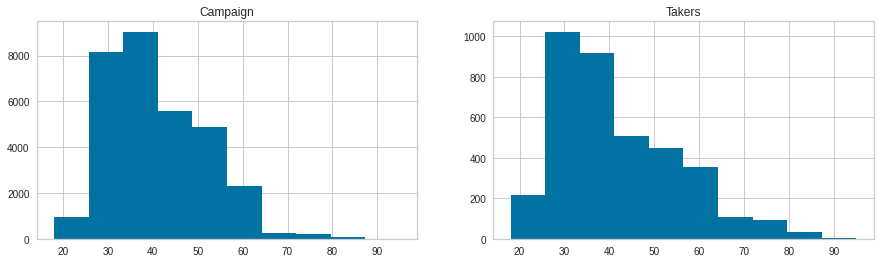

In [ ]:
fig, axs = fig, axes = plt.subplots(ncols=2,figsize=(15,4))
data.age.hist(ax=axs[0]).set_title('Campaign')
data_yes.age.hist(ax=axs[1]).set_title('Takers')


Text(0.5, 1.0, 'Takers')

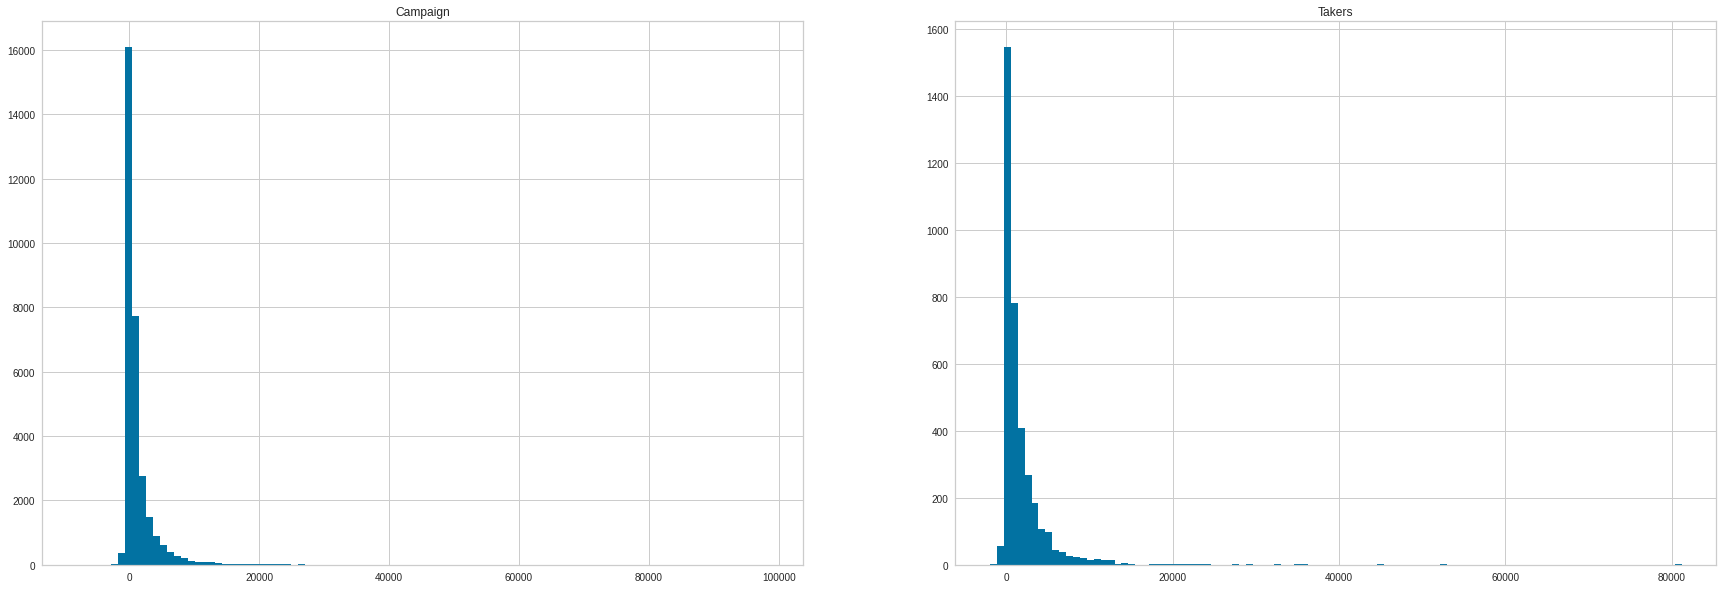

In [ ]:
fig, axs = fig, axes = plt.subplots(ncols=2,figsize=(30,10))
data.accountBalance.hist(ax=axs[0],bins=100).set_title('Campaign')
data_yes.accountBalance.hist(ax=axs[1],bins=100).set_title('Takers')

Text(0.5, 1.0, 'accountBalance')

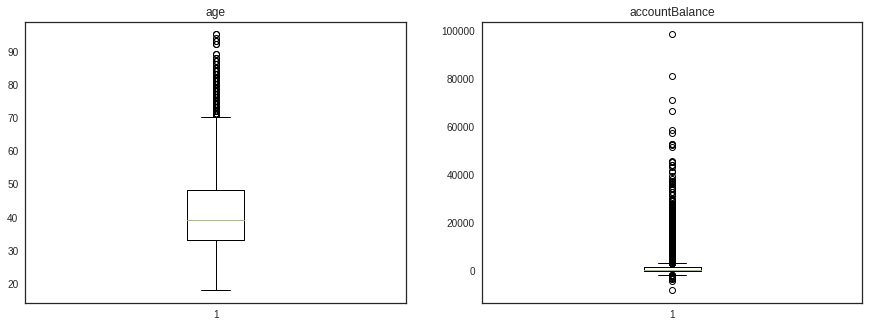

In [ ]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(data['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(data['accountBalance'])
ax.set_title('accountBalance')

In [ ]:
#Reorder ordinal variable 
data['target'] = data['target'].cat.reorder_categories(['no','yes'])
data['education'] = data['education'].cat.reorder_categories(['unknown','highSchool',
                                                              'secondarySchool','uniGraduated'])
data['creditFailure'] = data['creditFailure'].cat.reorder_categories(['no','yes'])
data['house'] = data['house'].cat.reorder_categories(['no','yes'])
data['credit'] = data['credit'].cat.reorder_categories(['no','yes'])
data['month'] = data['month'].cat.reorder_categories(['jan','feb',
                                                      'mar','apr',
                                                      'may','jun',
                                                      'jul','aug',
                                                      'sep','oct',
                                                      'nov','dec'])

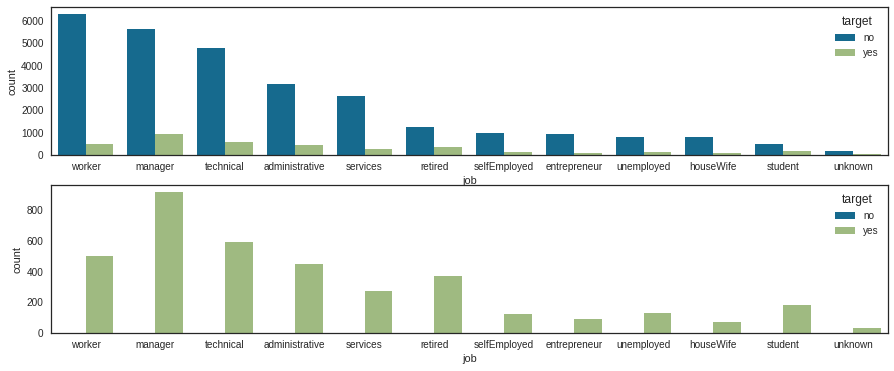

In [ ]:
#inspect job by subscription status
fig, axs = plt.subplots(nrows=2,figsize=(15,6))
sns.countplot(x = 'job',data = data,hue = 'target',ax=axs[0], order = data['job'].value_counts().index)
sns.countplot(x = 'job',data = data_yes,hue = 'target',ax=axs[1], order = data['job'].value_counts().index)

Pekerjaan paling banyak menjadi takers adalah manager dan technical meskipun customer yang diberi campaign paling banyak adalah worker.

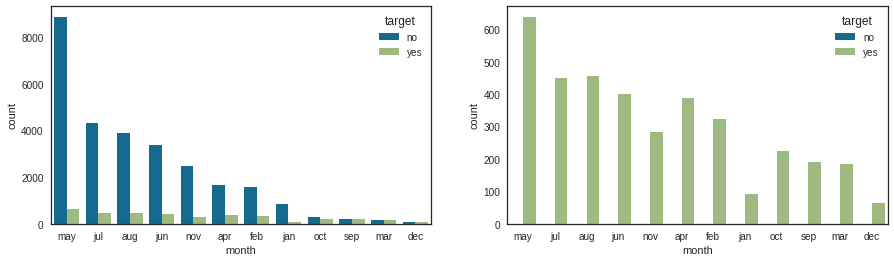

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x = 'month',data = data,hue = 'target',ax=axs[0],order = data['month'].value_counts().index)
sns.countplot(x = 'month',data = data_yes,hue = 'target',ax=axs[1],order = data['month'].value_counts().index)

Campaign terbanyak ada di May-Aug, sesuai dengan jumlah campaign, takers dari campaign juga terbanyak di May-Aug.



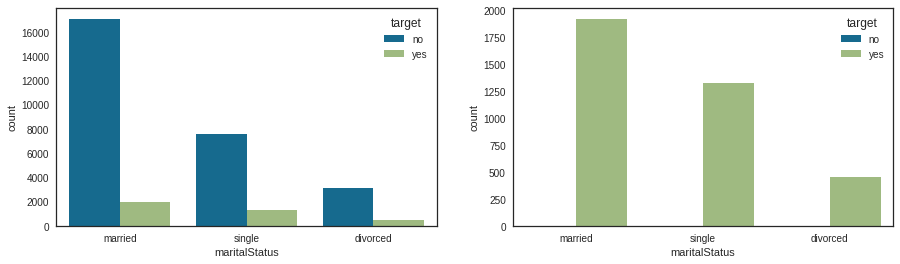

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x = 'maritalStatus',data = data,hue = 'target',ax=axs[0],order = data['maritalStatus'].value_counts().index)
sns.countplot(x = 'maritalStatus',data = data_yes,hue = 'target',ax=axs[1],order = data['maritalStatus'].value_counts().index)


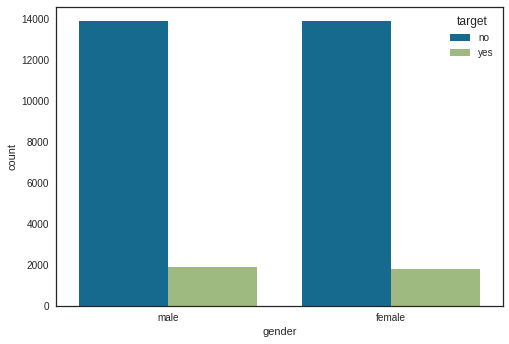

In [ ]:
sns.countplot(x = 'gender',data = data,hue = 'target',order = data['gender'].value_counts().index)

Jumlah Male/Female yang ditawarkan campaign atau menjadi takers proporsinya tidak berbeda jauh, sehingga kemungkinan gender bukan variable yang signifikan.

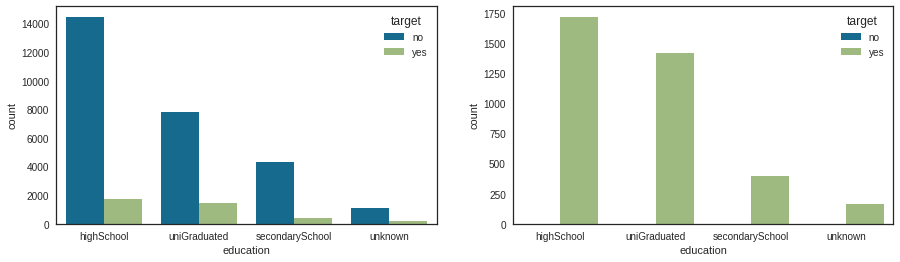

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x = 'education',data = data,hue = 'target',ax=axs[0],order = data['education'].value_counts().index)
sns.countplot(x = 'education',data = data_yes,hue = 'target',ax=axs[1],order = data['education'].value_counts().index)

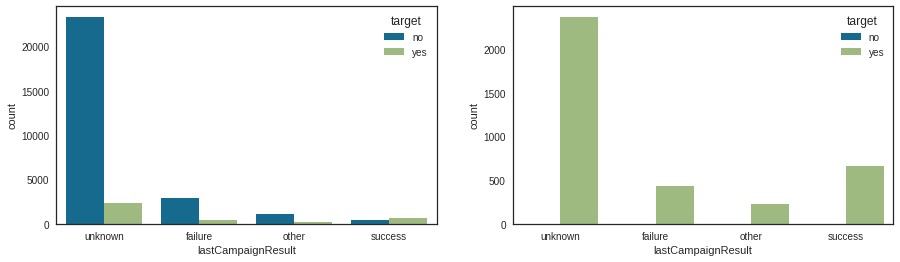

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x = 'lastCampaignResult',data = data,hue = 'target',ax=axs[0],order = data['lastCampaignResult'].value_counts().index)
sns.countplot(x = 'lastCampaignResult',data = data_yes,hue = 'target',ax=axs[1],order = data['lastCampaignResult'].value_counts().index)


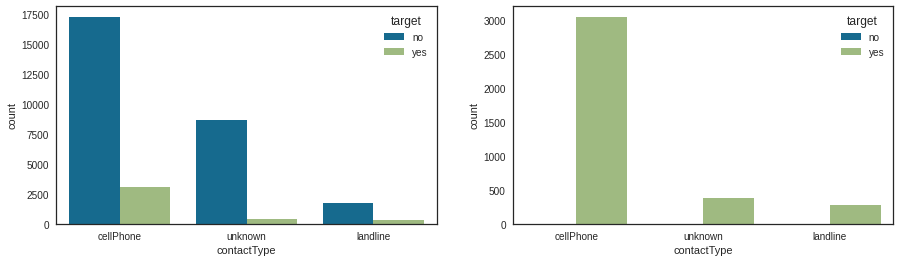

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x = 'contactType',data = data,hue = 'target',ax=axs[0],order = data['contactType'].value_counts().index)
sns.countplot(x = 'contactType',data = data_yes,hue = 'target',ax=axs[1],order = data['contactType'].value_counts().index)

In [ ]:
data_some = data[['duration', 'age', 'accountBalance','numberOfContacts']]
data_some.head()

,duration,age,accountBalance,numberOfContacts
0,166,30,-202,2
1,183,42,2463,2
2,227,26,2158,1
3,31,34,75,3
4,1231,48,559,2


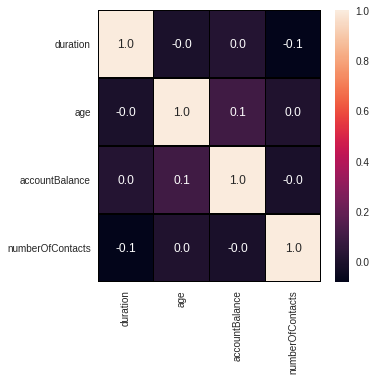

In [ ]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data_some.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Atempting to find relatively high feature correlation with target

In [ ]:
datax = data.drop(["month","day"], axis=1)
data_target = pd.get_dummies(datax)
data_target.head()

,id,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,target_new,education_new,creditFailure_new,house_new,credit_new,month_new,gender_male,job_entrepreneur,job_houseWife,job_manager,job_retired,job_selfEmployed,job_services,job_student,job_technical,job_unemployed,job_unknown,job_worker,maritalStatus_married,maritalStatus_single,contactType_landline,contactType_unknown,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown,target_no,target_yes,gender_female,gender_male,job_administrative,job_entrepreneur,job_houseWife,job_manager,job_retired,job_selfEmployed,job_services,job_student,job_technical,job_unemployed,job_unknown,job_worker,maritalStatus_divorced,maritalStatus_married,maritalStatus_single,education_unknown,education_highSchool,education_secondarySchool,education_uniGraduated,creditFailure_no,creditFailure_yes,house_no,house_yes,credit_no,credit_yes,contactType_cellPhone,contactType_landline,contactType_unknown,lastCampaignResult_failure,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown
0,432148809,166,623,30,-202,2,NaN,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
1,432184318,183,1992,42,2463,2,NaN,0,0,3,0,0,0,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
2,432182482,227,2778,26,2158,1,NaN,0,0,1,0,1,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
3,432150520,31,3070,34,75,3,NaN,0,0,3,1,1,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1
4,432145870,1231,6583,48,559,2,NaN,0,0,2,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
data_target = data_target.drop(columns=['id', 'target_no', 'target_new', 'education_new', 'creditFailure_new','credit_new', 'house_new'])
data_target.head()

,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,month_new,gender_male,job_entrepreneur,job_houseWife,job_manager,job_retired,job_selfEmployed,job_services,job_student,job_technical,job_unemployed,job_unknown,job_worker,maritalStatus_married,maritalStatus_single,contactType_landline,contactType_unknown,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown,target_yes,gender_female,gender_male,job_administrative,job_entrepreneur,job_houseWife,job_manager,job_retired,job_selfEmployed,job_services,job_student,job_technical,job_unemployed,job_unknown,job_worker,maritalStatus_divorced,maritalStatus_married,maritalStatus_single,education_unknown,education_highSchool,education_secondarySchool,education_uniGraduated,creditFailure_no,creditFailure_yes,house_no,house_yes,credit_no,credit_yes,contactType_cellPhone,contactType_landline,contactType_unknown,lastCampaignResult_failure,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown
0,166,623,30,-202,2,NaN,0,4,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
1,183,1992,42,2463,2,NaN,0,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
2,227,2778,26,2158,1,NaN,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
3,31,3070,34,75,3,NaN,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1
4,1231,6583,48,559,2,NaN,0,4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
target_corr = pd.DataFrame(data_target.corr()['target_yes'].sort_values(ascending=False)).reset_index().drop_duplicates('index', keep='first')
target_corr_get = target_corr[abs(target_corr['target_yes'])>=0.03]
target_corr_get

,index,target_yes
0,target_yes,1.000000
1,duration,0.394059
2,lastCampaignResult_success,0.299590
4,house_no,0.136624
5,contactType_cellPhone,0.135108
6,numberOfContactsLastCampaign,0.084866
7,job_retired,0.080035
9,education_uniGraduated,0.072252
10,job_student,0.071846
12,credit_no,0.065565


In [ ]:
print("List of possible feature with relatively high correlation with target\n")
list(target_corr_get["index"])[1:]

List of possible feature with relatively high correlation with target



['duration',
 'lastCampaignResult_success',
 'house_no',
 'contactType_cellPhone',
 'numberOfContactsLastCampaign',
 'job_retired',
 'education_uniGraduated',
 'job_student',
 'credit_no',
 'maritalStatus_single',
 'accountBalance',
 'job_manager',
 'lastCampaignResult_other',
 'education_highSchool',
 'education_secondarySchool',
 'maritalStatus_married',
 'credit_yes',
 'job_worker',
 'numberOfContacts',
 'house_yes',
 'daySinceLastCampaign',
 'contactType_unknown',
 'lastCampaignResult_unknown']

## Modelling

Kami menggunakan package pycaret untuk memudahkan pemodelan, sesuai yang diajarkan pada case study sebelumnya.

In [ ]:
!pip install pycaret

In [ ]:
all_data = pd.read_csv('train.csv')
data_model = all_data.sample(frac=0.9, random_state=786)
data_unseen = all_data.drop(data_model.index)
data_model.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (28332, 20)
Unseen Data For Predictions: (3148, 20)


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

Data awal yang digunakan imbalance, hanya 13% yang merupakan takers. Untuk menangani masalah tersebut, kita gunakan SMOTE. Dengan pycaret, data train dan data test dibagi dengan perbandingan yaitu 70:30.

In [ ]:
exp_clf101 = setup(data = data_model, target = 'target', fix_imbalance = True,session_id=345, ignore_features=['id'], remove_multicollinearity=True,remove_outliers=True,feature_selection=True, data_split_stratify = True)

,Description,Value
0,session_id,345
1,Target,target
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(28332, 20)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
set_config('seed', 45)

Mencari model terbaik berdasarkan akurasi

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9128,0.9311,0.4841,0.6303,0.5468,0.4996,0.5053,1.102
gbc,Gradient Boosting Classifier,0.9097,0.9203,0.4763,0.6097,0.5342,0.4851,0.4899,10.308
rf,Random Forest Classifier,0.9042,0.9204,0.3265,0.6137,0.4253,0.3784,0.4014,4.367
et,Extra Trees Classifier,0.9039,0.9112,0.3401,0.6023,0.4341,0.3861,0.4053,4.092
ada,Ada Boost Classifier,0.9005,0.8953,0.4495,0.5520,0.4950,0.4405,0.4436,2.376
dummy,Dummy Classifier,0.8912,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.079
dt,Decision Tree Classifier,0.8747,0.6988,0.4739,0.4311,0.4512,0.3807,0.3814,0.395
lda,Linear Discriminant Analysis,0.8615,0.9074,0.7735,0.4255,0.5488,0.4751,0.5049,0.320
ridge,Ridge Classifier,0.8614,0.0000,0.7735,0.4251,0.5485,0.4748,0.5046,0.096
nb,Naive Bayes,0.8183,0.7814,0.5754,0.3160,0.4077,0.3110,0.3307,0.094


##Model Light Gradient Boosting Machine
Model LGBM dipilih karena memiliki akurasi terbesar. Akan tetapi, perlu dilakukan optimasi terhadap recall. Recall digunakan sebagai metrics untuk memastikan customer yang berpotensi menjadi takers akan mendapatkan campaign tersebut. 

In [ ]:
lightgbm = create_model('lightgbm',probability_threshold=0.20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8907,0.9393,0.7892,0.4969,0.6098,0.5501,0.5700
1,0.8769,0.9310,0.7756,0.4609,0.5782,0.5115,0.5353
2,0.8806,0.9254,0.7610,0.4699,0.5810,0.5159,0.5363
3,0.8891,0.9330,0.7902,0.4939,0.6079,0.5472,0.5678
4,0.8933,0.9300,0.7707,0.5064,0.6112,0.5524,0.5688
5,0.8859,0.9284,0.7659,0.4846,0.5936,0.5311,0.5499
6,0.8731,0.9154,0.7805,0.4520,0.5725,0.5041,0.5301
7,0.8965,0.9377,0.8146,0.5154,0.6314,0.5747,0.5951
8,0.8891,0.9393,0.8000,0.4940,0.6108,0.5503,0.5721
9,0.8896,0.9313,0.8146,0.4955,0.6162,0.5562,0.5796


In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Kemudian dicoba tuning model yang mengoptimalkan nilai recall.

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8912,0.9385,0.7794,0.4984,0.6080,0.5484,0.5669
1,0.8816,0.9278,0.7951,0.4738,0.5938,0.5297,0.5540
2,0.8859,0.9224,0.7756,0.4848,0.5966,0.5342,0.5543
3,0.8896,0.9313,0.7951,0.4954,0.6105,0.5502,0.5711
4,0.8933,0.9280,0.7707,0.5064,0.6112,0.5524,0.5688
5,0.8917,0.9288,0.7805,0.5016,0.6107,0.5512,0.5694
6,0.8747,0.9121,0.7805,0.4558,0.5755,0.5079,0.5332
7,0.8970,0.9343,0.7902,0.5176,0.6255,0.5688,0.5859
8,0.8949,0.9377,0.7951,0.5110,0.6221,0.5644,0.5831
9,0.8917,0.9316,0.8049,0.5015,0.6180,0.5588,0.5801


In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Tuning model menghasilkan model yang lebih baik. Sehingga model yang digunakan adalah model LGBM yang sudah dituning. Dengan menggunakan model tersebut setidaknya 803 dari 971 (82%) orang actual takers dari data test berhasil diprediksi sebagai takers. Namun terdapat tambahan 801 actual non-takers yang diprediksi oleh model sebagai potential takers. Meskipun begitu total prediksi 1604 masih dianggap wajar mengingat total populasi keseluruhan adalah 8500. Total prediksi hanya 18% dari total populasi. Sehingga penghematan cost diestimasi sekitar 82% dari actual cost yang biasanya digunakan. 